<a href="https://colab.research.google.com/github/ajrianop/ML/blob/main/03_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means**

K-Means clustering is method of unsupervised learning which attempts to split data into K groups which are near to a centroid (this groups also are called clusters).
This methods could be used to classified the place where are located milloniares in a city, detect areas of crimes, cluster documents according to different categories, classify music, between other applications.

**How does it work?**
* This choose ramdomly K centroids
* Assing to each centroid points in our data, those whose are closest to.
* Then recompute the centroids based on the average posirion of each centroid's points.
* Do the same until the assignments to the centroids stop.

**Some issues with K-means**

* If we choose different centroids, it can yield to different results, so it is a good idea to run this several times to make you sure.
* The cluster that you obtain does not have any sense until you study deeply the information related to this clusters.

## **Example**

In [1]:
#Importing libraries
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
#from numpy import random, float

### 1. First we are going to create a random dataset with 100 elements:

In [2]:
# Generate random array of size 100x2
np.random.seed(3)
data = np.random.randint(low=0, high=1000, size=(100, 2))
data[0:3]

array([[874, 664],
       [249, 643],
       [952, 968]])

The data behaves as follows

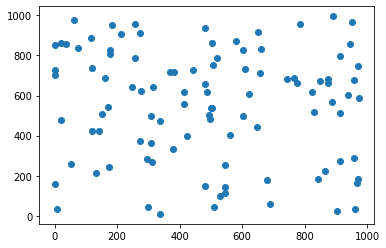

In [3]:
plt.scatter(data[:,0], data[:,1])

The idea is to find four clusters according to the random dataset generated with numpy. And so on, we generate the clusters described by means a number according to the assignment. This information can be recovered with `model.labels_`

In [4]:
# Calling the K-Means model with 4 cluster
model = KMeans(n_clusters=4)

# In order to have good results, we have to standarized the data along any axis
scaleData=scale(data)
model = model.fit(scaleData)

# To each cluster is given a number, the following show how this assignment behaves.
assigments= model.labels_
print('Assginment to each cluster:', model.labels_)

# The cluster centers
centroids=model.cluster_centers_
print("Cluster Centers:", model.cluster_centers_)

Assginment to each cluster: [2 0 2 0 2 2 2 1 2 2 1 2 1 2 0 0 2 2 2 0 1 2 1 1 0 0 1 0 2 2 0 1 2 0 3 2 3
 0 0 2 2 2 2 2 3 3 3 1 1 3 1 2 1 0 2 0 3 1 2 0 2 1 0 1 1 0 1 0 0 0 1 0 0 3
 3 1 1 2 0 3 0 1 2 0 3 2 2 1 2 2 2 3 3 3 1 0 2 1 3 3]
Cluster Centers: [[-0.91082792  0.89119136]
 [-0.76278854 -0.75216581]
 [ 0.84004481  0.53283744]
 [ 0.83918295 -1.4522168 ]]


In [5]:
'''
If we have to recover the centroids with this information it will be neccesarry
to unstandarized the data, for this process we need the mean and standard
deviation of each curve.
'''
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
coor1 = centroids[0][0] * stds[0] + means[0]
coor2 = centroids[0][1] * stds[1] + means[1]
print(coor1, coor2)


scaler=StandardScaler()
scaler.fit(data)
scaled2=scaler.transform(data)
inv=scaler.inverse_transform(centroids)
print(scaleData[0:3], scaled2[0:3], inv)


214.0384615384616 799.0384615384615
[[ 1.26820507  0.40301246]
 [-0.79539339  0.32709515]
 [ 1.52574216  1.5020059 ]] [[ 1.26820507  0.40301246]
 [-0.79539339  0.32709515]
 [ 1.52574216  1.5020059 ]] [[214.03846154 799.03846154]
 [258.875      344.45833333]
 [744.32352941 699.91176471]
 [744.0625     150.8125    ]]


We can classify a dataset according to different cluster, we need to take care when we standarized the data; due to if we want to write the centroids, could be more difficult to described then according to the model generated with standirezed data. We describe the information using the standarized data and plot it:

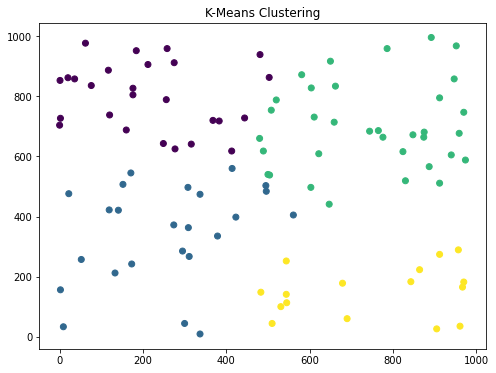

In [6]:
# We plot the information given before:
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(float))
plt.title('K-Means Clustering')
plt.show()

With the information without standarized we can plot the centroids using:

Assginment to each cluster: [0 3 0 3 0 0 0 1 0 0 1 1 1 0 3 3 0 0 0 1 1 0 1 1 3 3 1 3 1 0 3 1 0 3 2 0 2
 3 3 0 0 0 0 0 2 2 2 1 1 2 1 0 1 3 0 3 2 1 0 3 0 1 3 1 1 3 1 3 3 3 1 3 3 2
 2 1 1 0 3 2 3 1 2 3 2 0 0 1 0 0 0 2 2 2 1 0 0 1 2 2]
Cluster Centers: [[754.96875    723.15625   ]
 [282.59259259 369.        ]
 [738.35294118 167.88235294]
 [193.70833333 803.91666667]]


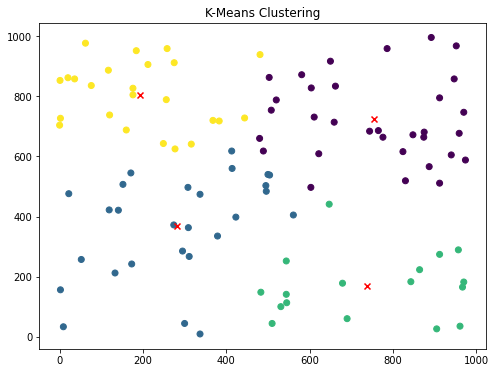

In [7]:
# Calling the K-Means model with 4 cluster
model2 = KMeans(n_clusters=4)

# In order to do an easy plot of the centroids we can use the data without standarized
model2 = model2.fit(data)

# To each cluster is given a number, the following show how this assignment behaves.
assigments2= model2.labels_
print('Assginment to each cluster:', model2.labels_)

# The cluster centers
centroids2=model2.cluster_centers_
print("Cluster Centers:", model2.cluster_centers_)

# We plot the information given before:
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1], c=model2.labels_.astype(float))
plt.scatter(model2.cluster_centers_[:,0], model2.cluster_centers_[:,1], marker='x', c='red')
plt.title('K-Means Clustering')
plt.show()

### 2. Generating some distinguised groups in order to find its classification, and to see the power of K-means model.

We consider some fixed centroids to spread out the information locally:

In [8]:
def randomDataSet(N, k): 
  '''
  N = Amount of data set
  k = Number of the partition of the data set
  If k does not divide N, the amount of data set will be less
  '''
  np.random.seed(6)
  numberClusterPoints = N / k
  dataSet = []
  centroids = []
  for i in range(k):
    centroidX = np.random.uniform(10000, 120000)
    centroidY = np.random.uniform(100, 2000)
    centroids.append([centroidX , centroidY])
    for j in range(int(numberClusterPoints)):
      dataSet.append([np.random.normal(centroidX, 5000), np.random.normal(centroidY, 100)])
  centroids= np.array(centroids)
  dataSet = np.array(dataSet)
  return dataSet,centroids

Assginment to each cluster: [2 4 2 2 2 4 2 2 2 2 4 2 2 4 4 2 2 4 4 2 4 4 2 4 2 4 4 2 2 2 4 2 2 4 2 2 2
 4 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 4 2 4 2 2 2 4 2 4 4 2 4 2 4 2 4 4 2 2 4 2 2
 2 2 4 2 4 4 2 2 2 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3
 1 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Cluster Centers: [[ 69859.56530407    787.20992019]
 [ 13354.27566585    224.50404173]
 [112068.74010276    866.77116593]
 [ 30447.40690832    707.83269712]
 [104724.02214412    857.87160676]]


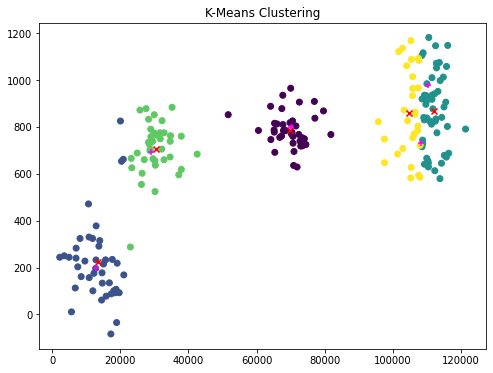

In [9]:
#Generating the dataset
ds=randomDataSet(200, 5)

# Calling the K-Means model with 4 cluster
model2 = KMeans(n_clusters=5)

# In order to do an easy plot of the centroids we can use the data without standarized
model2 = model2.fit(ds[0])

# To each cluster is given a number, the following show how this assignment behaves.
assigments2= model2.labels_
print('Assginment to each cluster:', model2.labels_)

# The cluster centers
centroids2=model2.cluster_centers_
print("Cluster Centers:", model2.cluster_centers_)

# We plot the information given before:
plt.figure(figsize=(8, 6))
plt.scatter(ds[0][:,0], ds[0][:,1], c=model2.labels_.astype(float))
plt.scatter(model2.cluster_centers_[:,0], model2.cluster_centers_[:,1], marker='x', c='red')
plt.scatter(ds[1][:,0], ds[1][:,1], marker='+', c='magenta')
plt.title('K-Means Clustering')
plt.show()

By utilizing randomly selected centroids that closely align with those computed through the K-Means model, we are able to classify and characterize clusters that possess similar features. Take into account that in general, according to a dataset, we have to study this deeply in order to obtain a good conclusion.